In [3]:
import cv2
#Libreria Numpy
import numpy as np
#Libreria de opciones de sistema
import os
#Dar importancia de mensajes
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
#Importar pandas
import pandas as pd
#Importar librerias graficas
import matplotlib.pyplot as plt
from  PIL  import Image
#Importar librerias de analisis
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
#Importar libreria de tiempo
from time import sleep
#Importo libreria para divirvir el set
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


In [4]:
#Ruta de origen de .ipynb
root_path = os.path.abspath('.')
print(root_path)
#Obtener ruta de carpeta con imagenes
images_path =root_path+"/Clases"
#Enlistar carpetas de imagenes
class_names = os.listdir(images_path)
#Clasificar carpetas
class_names.sort()
print(class_names)

c:\Users\VINICIO BORJA\Desktop\IA\Unidad3\Borja_Lab1\ModelamientoIdentificaci-nUsuario
['CevallosJoan', 'GenesisHeredia', 'LeonardoBorja', 'LucioCarlos', 'ParragaMariaJose']


In [5]:
#copiar las bananas
#Ruta de imagnes aumentadas
banana_path= root_path+"/Clases_Dataset_Augmented"
#Iteracion por cada clase
for class_name in class_names:
    #Formacion de ruta de clase
    cur_path = images_path + "/" + class_name
    #Creacion de ruta de lementos
    elements = os.listdir(cur_path)
    #Creacion de ruta de archivos aumentados
    os.makedirs(banana_path+"/"+ class_name, exist_ok=True)
    
    for element in elements:
        print("Copying Image - {} in Clases_Dataset_Augmented/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join(banana_path+"/" + class_name, element) 
        shutil.copy(src, dst)

Copying Image - L00376416_1.jpg in Clases_Dataset_Augmented/CevallosJoan
Copying Image - L00376416_2.jpg in Clases_Dataset_Augmented/CevallosJoan
Copying Image - L00376416_3.jpg in Clases_Dataset_Augmented/CevallosJoan
Copying Image - L00392991_1.jpg in Clases_Dataset_Augmented/GenesisHeredia
Copying Image - L00392991_2.jpg in Clases_Dataset_Augmented/GenesisHeredia
Copying Image - L00392991_3.jpg in Clases_Dataset_Augmented/GenesisHeredia
Copying Image - L00393007_1.jpg in Clases_Dataset_Augmented/LeonardoBorja
Copying Image - L00393007_2.jpg in Clases_Dataset_Augmented/LeonardoBorja
Copying Image - L00393007_3.jpg in Clases_Dataset_Augmented/LeonardoBorja
Copying Image - L00393009_1.jpg in Clases_Dataset_Augmented/LucioCarlos
Copying Image - L00393009_2.jpg in Clases_Dataset_Augmented/LucioCarlos
Copying Image - L00393009_3.jpg in Clases_Dataset_Augmented/LucioCarlos
Copying Image - L00392984_1.jpg in Clases_Dataset_Augmented/ParragaMariaJose
Copying Image - L00392984_2.jpg in Clases

## Aumento de Datos

In [6]:
#Crear generador de datos de imagen
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

## Clase BarraganSteven

In [7]:
#Cambiar de direccion a imagenes verde
os.chdir(banana_path+"/CevallosJoan")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'CevallosJoan', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

## Clase LeonardoBorja

In [8]:
#Cambiar de direccion a imagenes amarrillo y verde
os.chdir(banana_path+"/LeonardoBorja")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)   # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",  
            save_prefix= 'LeonardoBorja', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break  

## Clase GenesisHeredia

In [9]:
#Cambiar de direccion a imagenes amarrillo y marron
os.chdir(banana_path+"/GenesisHeredia")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg    
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'GenesisHeredia', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break 

## Clase LucioCarlos

In [10]:
#Cambiar de direccion a imagenes amarrillo y marron
os.chdir(banana_path+"/LucioCarlos")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg    
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'LucioCarlos', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break 

## Clase ParragaMariaJose

In [11]:
#Cambiar de direccion a imagenes amarrillo y marron
os.chdir(banana_path+"/ParragaMariaJose")
#Leer imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # Esto es un arreglo Numpy array con dimension (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    #Crear imagenes con formato jpg    
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'ParragaMariaJose', 
            save_format='jpg'):
        i += 1
        if i == 10:     ## crear 10 imagenes de 1 imagen 
            break 

## Filtro NLM para eliminación de ruido de imágenes

In [12]:
os.chdir(root_path)
images_path = root_path+"/Clases_Dataset_Augmented/"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['CevallosJoan', 'GenesisHeredia', 'LeonardoBorja', 'LucioCarlos', 'ParragaMariaJose']


In [13]:
#Lectura de cada clase de imagen
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    # Carpeta de modificados
    file_path = root_path+"/Class_Dataset_Denoised/"+ cur_label
    #Creacion de rcarpeta para archivos modificaos
    os.makedirs(file_path, exist_ok=True)
    i = 1
    #Procesamiento de cada imeagen
    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # lectura de ruta de imagen
        image = cv2.imread(file)
        # imagen filtrada
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # guardar imagen
        save_path = file_path
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        # conteo de procesos
        i += 1


Processing Image - 1 in CevallosJoan
Processing Image - 2 in CevallosJoan
Processing Image - 3 in CevallosJoan
Processing Image - 4 in CevallosJoan
Processing Image - 5 in CevallosJoan
Processing Image - 6 in CevallosJoan
Processing Image - 7 in CevallosJoan
Processing Image - 8 in CevallosJoan
Processing Image - 9 in CevallosJoan
Processing Image - 10 in CevallosJoan
Processing Image - 11 in CevallosJoan
Processing Image - 12 in CevallosJoan
Processing Image - 13 in CevallosJoan
Processing Image - 14 in CevallosJoan
Processing Image - 15 in CevallosJoan
Processing Image - 16 in CevallosJoan
Processing Image - 17 in CevallosJoan
Processing Image - 18 in CevallosJoan
Processing Image - 19 in CevallosJoan
Processing Image - 20 in CevallosJoan
Processing Image - 21 in CevallosJoan
Processing Image - 22 in CevallosJoan
Processing Image - 23 in CevallosJoan
Processing Image - 24 in CevallosJoan
Processing Image - 25 in CevallosJoan
Processing Image - 26 in CevallosJoan
Processing Image - 27

## Eliminacion de Fondo

In [14]:
#Ruta de imagenes filtradas
images_path = root_path+"/Class_Dataset_Denoised/"
#BUsqueda de clases
class_names = os.listdir(images_path)
class_names.sort()
#Impresion de clases
print(class_names)

['CevallosJoan', 'GenesisHeredia', 'LeonardoBorja', 'LucioCarlos', 'ParragaMariaJose']


In [15]:
#Iteracion en cada clase
for class_name in class_names:
    #Ruta de clase
    cur_path = images_path + "/" + class_name
    #Nombre de calse
    cur_label = class_name
    # Carpeta de modificados
    file_path = root_path+"/Class_Dataset_RemovedBG/"+ cur_label
    #Creacion de carpeta para archivos modificaos
    os.makedirs(file_path, exist_ok=True)
    i = 1
    #Procesamiento de cada imagen
    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # Lectura de imagen
        image = cv2.imread(file)
        # remocion de fondo
        output = remove(image)
        # Guardado de imagen
        save_path = file_path
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        # Conteo de proceso
        i += 1

Processing Image - 1 in CevallosJoan
Processing Image - 2 in CevallosJoan
Processing Image - 3 in CevallosJoan
Processing Image - 4 in CevallosJoan
Processing Image - 5 in CevallosJoan
Processing Image - 6 in CevallosJoan
Processing Image - 7 in CevallosJoan
Processing Image - 8 in CevallosJoan
Processing Image - 9 in CevallosJoan
Processing Image - 10 in CevallosJoan
Processing Image - 11 in CevallosJoan
Processing Image - 12 in CevallosJoan
Processing Image - 13 in CevallosJoan
Processing Image - 14 in CevallosJoan
Processing Image - 15 in CevallosJoan
Processing Image - 16 in CevallosJoan
Processing Image - 17 in CevallosJoan
Processing Image - 18 in CevallosJoan
Processing Image - 19 in CevallosJoan
Processing Image - 20 in CevallosJoan
Processing Image - 21 in CevallosJoan
Processing Image - 22 in CevallosJoan
Processing Image - 23 in CevallosJoan
Processing Image - 24 in CevallosJoan
Processing Image - 25 in CevallosJoan
Processing Image - 26 in CevallosJoan
Processing Image - 27

## Carga de Datos y Exploracion

In [18]:
root_path = os.path.abspath('.')
print(root_path)
#Obtener ruta de carpeta con imagenes
fpath =root_path+"/Class_Dataset_RemovedBG"
#Permite Generar numeros aleatorios
random_seed = 42
#Obtengo las clases de las carpetas
categories = os.listdir(fpath)
#Defino un numero maximo de categorias
categories = categories[:20]
#Imprimo la lista de categorias y el numero
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

c:\Users\VINICIO BORJA\Desktop\IA\Unidad3\Borja_Lab1\ModelamientoIdentificaci-nUsuario
List of categories =  ['CevallosJoan', 'GenesisHeredia', 'LeonardoBorja', 'LucioCarlos', 'ParragaMariaJose'] 

No. of categories =  5


In [19]:
#Exploro las imagenes y las etiquetas de clase de cada una de las categorias
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #REDIMENSIONO las imagenes ya que 227 es la con la dimension que usa AlexNet
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

#Indico el numero de imagenes cargadas y de igual forma la etiqueta que tiene

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  165 
No. of labels loaded =  165
<class 'list'> <class 'list'>


In [20]:
#Genero un arreglo tanto de las imagenes como de las etiquetas
images = np.array(images)
labels = np.array(labels)
#Imprimo el tamaño de las imagenes y de las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (165, 227, 227, 3) 
Labels shape =  (165,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


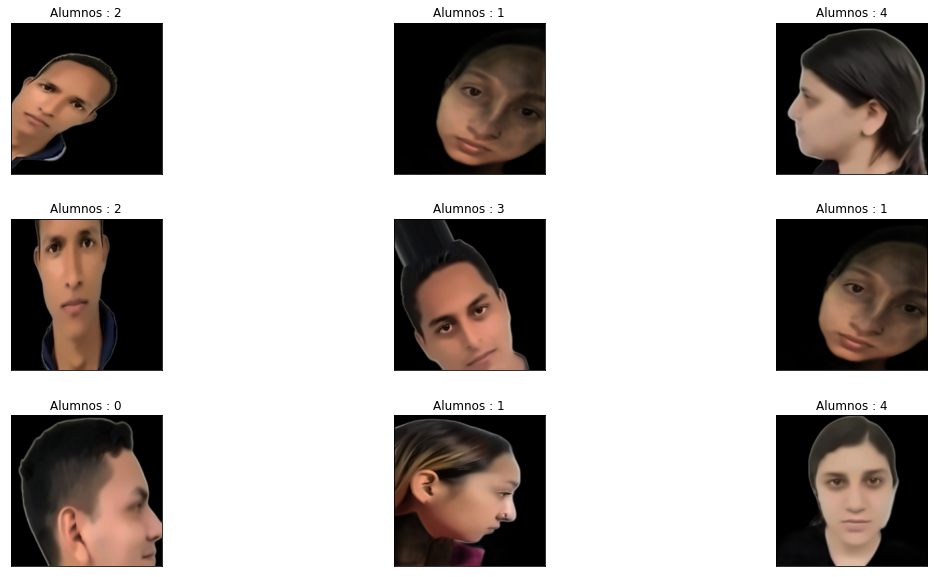

In [21]:
#Muestro magenes randomicas en las cuales se muestre tanto la imagen con la etiqueta que tiene
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Alumnos : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [22]:
#El paso n.º 1 en la reorganización de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164]

'n' values after shuffling =  [135 115 131  55  95  29 158  51 101 145  19  85  15  66  24  30 132 105
 153  16  75  18  12   9  31 156  98  56 134 161 139  78  60  84   2  94
  45  42  69 154  26 141 117  93 133  36  82  22 126  67  97  11  65  86
   6  27  76 142  38  41   4 138  32 144 109  68

## Preparo los datos para la CNN

In [23]:
#El paso n.º 2 en la reorganización de datos

#barajar las imágenes y los datos de las etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (165, 227, 227, 3) 
Labels shape after shuffling =  (165,)


In [24]:
#Se procede a hacer una normalizacion de las imagenes y de las etiquetas
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (165, 227, 227, 3)


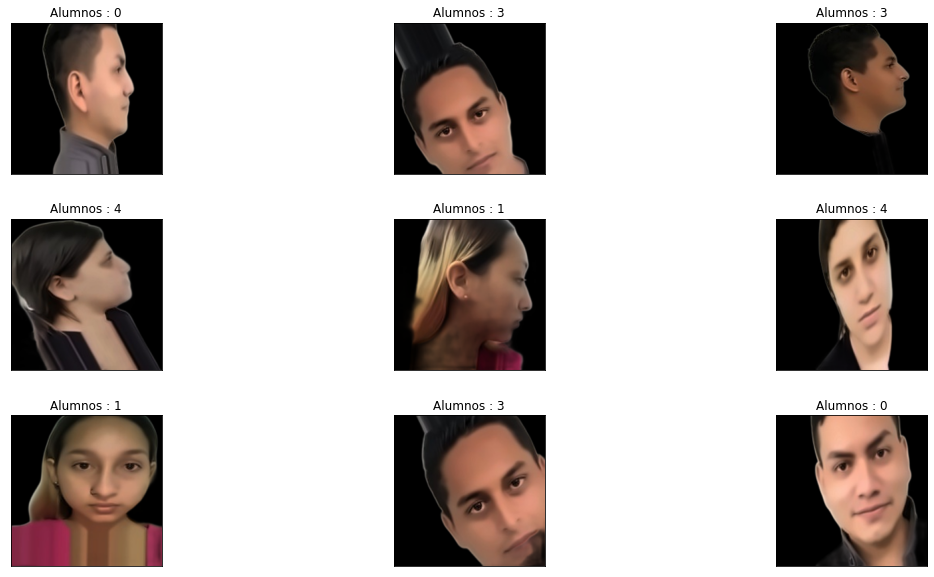

In [31]:
#Muestro imagenes random con sus etiquetas.
display_rand_images(images, labels)

## Divido el Set de Entrenamiento y Prueba